In [56]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import utils as ut

system_name = 'dql_const'
run_name = 'detach'
data_dir = './data/' + system_name + '/' + run_name + '/'
#plot_dir = '../plots/'+system_name+'/'+run_name+'/'

## Learning of the 3d kite - relative velocity angle- with sarsa

In [57]:
params = ut.read_params(data_dir+'parameters.txt')
for ep in params:
    print(ep, params[ep])

integration_step 0.001
episode_duration 300.0
learning_step 0.2
penalty 0.8
wind_type const
v_wind_x 10.0
v_wind_y 0.0
v_wind_z 0.0
learning_type dql
gamma 1.0
episodes 1000.0
eta0 0.0001
eta_decay_start 500000.0
eta_decay_rate 0.9
eta_c 1.0
eps0 0.01
eps_decay_start 500000.0
eps_decay_rate 1.3
eps_c 1.0
optimizer adam
loss huber
max_power 0.0


In [58]:
# read durations and returns
d_traj, r_traj = ut.read_traj(data_dir+'/return.txt')

l_steps = np.cumsum(d_traj)
print(l_steps)

[   1500    2942    4248    5748    7130    8457    9957   11074   12370
   13572   15072   16498   17998   19287   20732   22213   23713   25213
   26238   27618   29058   30413   31740   33175   34395   35821   37053
   38553   39957   41457   42684   43967   45169   46406   47841   49119
   50528   52028   53205   54348   55791   57165   58465   59965   61311
   62507   63853   65353   66570   67803   69217   70717   71992   73446
   74946   76445   77580   79080   80330   81759   83259   84578   85861
   87275   88775   90152   91652   93152   94652   96058   97558   99058
  100445  101945  103216  104716  106216  107642  108925  110425  111579
  112924  114424  115911  117411  118911  120411  121911  123182  124682
  126129  127629  128948  130448  131892  133166  134428  135928  137281
  138781  140020  141363  142863  144266  145766  146937  148229  149631
  150841  152226  153557  154920  156420  157610  158996  160229  161656
  163156  164347  165782  167199  168568  169568  1

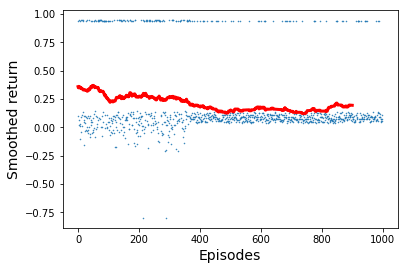

In [59]:
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Smoothed return', fontsize=14)

plt.plot(r_traj, 'o', markersize=0.5)

smooth = np.convolve(r_traj, np.ones(100), "valid")/100
plt.plot(smooth, color='red', lw=3)

plt.savefig(data_dir+'return.png', dpi=200)
plt.show()

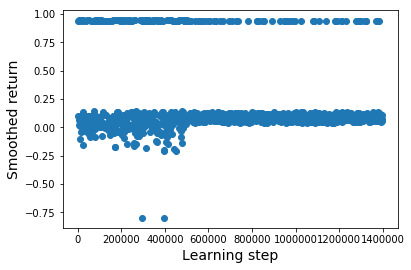

In [60]:
plt.xlabel('Learning step', fontsize=14)
plt.ylabel('Smoothed return', fontsize=14)

plt.plot(l_steps, r_traj, 'o')

#smooth = np.convolve(r_traj, np.ones(100))/100
#plt.plot(l_steps, smooth, color='red', lw=3)

plt.show()

(1501, 15, 7, 3, 3)


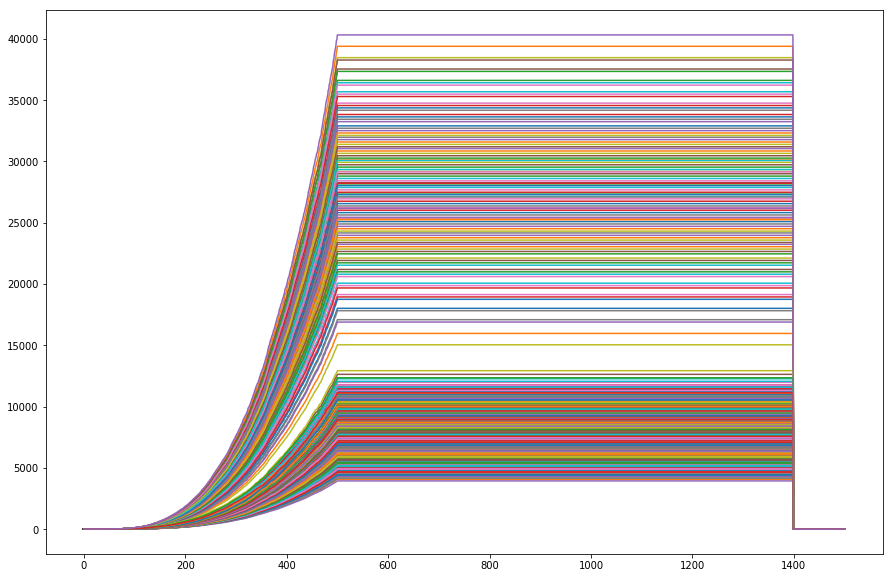

In [62]:
Q_traj = np.load(data_dir+"quality_traj.npy")
print(Q_traj.shape)

Q_traj = Q_traj.reshape(Q_traj.shape[0], -1)
#print(Q_traj.shape)

plt.figure(figsize = (15,10))
for i in range(Q_traj.shape[1]):
    plt.plot(Q_traj[:,i])
    
plt.savefig(data_dir+"quality_traj.png")
plt.show()

In [47]:
Q = np.load(data_dir+"best_quality.npy")
ind = np.argmax(Q_traj[4800])
np.unravel_index(ind, Q.shape)

(3, 0, 0, 2, 1)

[ 25.           0.          43.30127019]


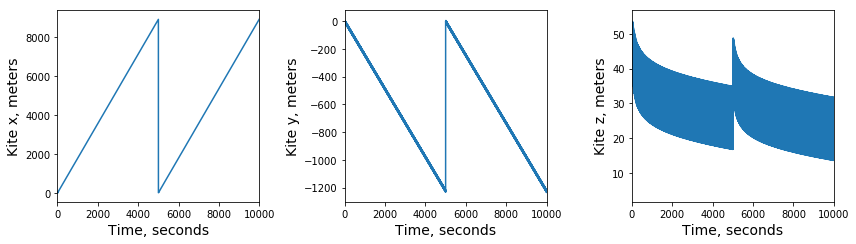

In [28]:
coordinates = np.load(data_dir+"eval_traj.npy")
controls = np.load(data_dir+"contr_traj.npy")
print(coordinates[0])

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

lim = [0,10000]

ax1.set_xlim(lim)
ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Kite x, meters', fontsize=14)
ax1.plot(coordinates[:,0])

ax2.set_xlim(lim)
ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Kite y, meters', fontsize=14)
ax2.plot(coordinates[:,1])

ax3.set_xlim(lim)
ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Kite z, meters', fontsize=14)
ax3.plot(coordinates[:,2])

plt.tight_layout()
plt.savefig(data_dir+"eval_traj.png", dpi=200)
plt.show()

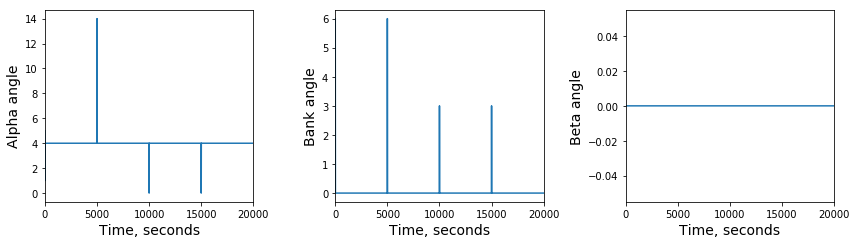

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

lim = [0,20000]

ax1.set_xlim(lim)
ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Alpha angle', fontsize=14)
ax1.plot(controls[:,0])

ax2.set_xlim(lim)
ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Bank angle', fontsize=14)
ax2.plot(controls[:,1])

ax3.set_xlim(lim)
ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Beta angle', fontsize=14)
ax3.plot(controls[:,2])

plt.tight_layout()
plt.savefig(data_dir+"contr_traj.png", dpi=200)
plt.show()

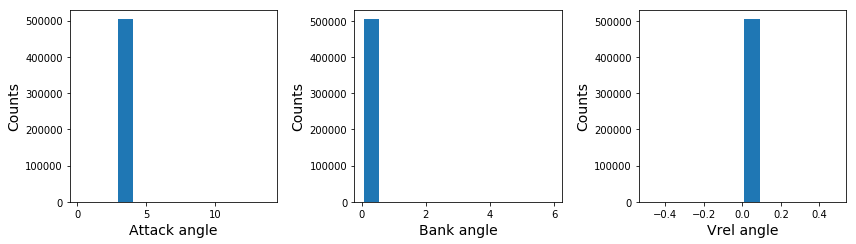

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

ax1.set_ylabel('Counts', fontsize=14)
ax1.set_xlabel('Attack angle', fontsize=14)
ax1.hist(controls[:,0], align='mid', rwidth=0.8)

ax2.set_ylabel('Counts', fontsize=14)
ax2.set_xlabel('Bank angle', fontsize=14)
ax2.hist(controls[:,1], align='mid', rwidth=0.8)

ax3.set_ylabel('Counts', fontsize=14)
ax3.set_xlabel('Vrel angle', fontsize=14)
ax3.hist(controls[:,2], align='mid', rwidth=0.8)

plt.tight_layout()
plt.savefig(data_dir+"contr_hist.png", dpi=200)
plt.show()